## **Project Name:** Petrol Price Forecasting  using Tensor Flow and Auto Keras

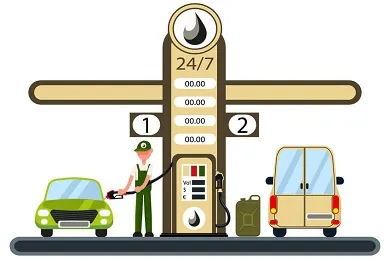

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different petrol prices for the upcoming dates given to us.

### We will use LSTM, ARIMA And Linear Regression forecasting models to predict the prices.

## TimeLine of the project:
- Data Analysis
- Model Building and predictions using ML techniques
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv(r"/content/train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [4]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [5]:
df2 = df1.dropna()

In [8]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


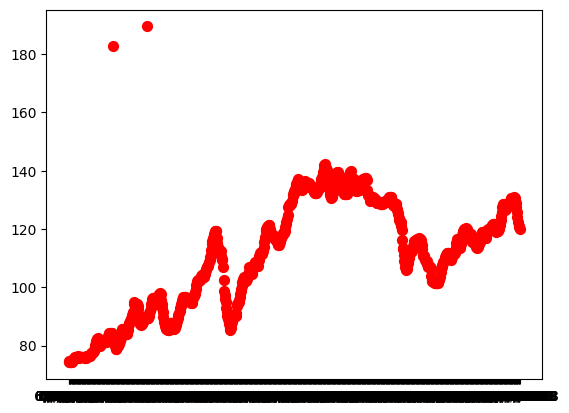

In [9]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

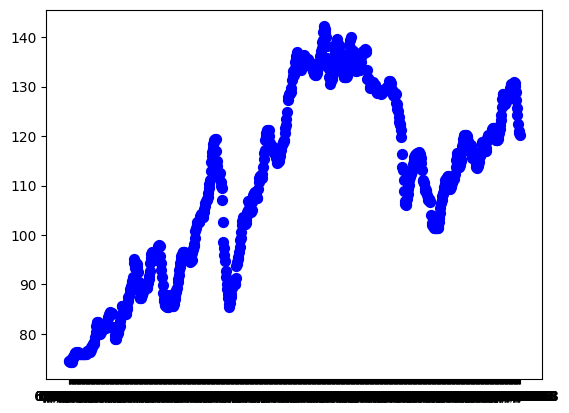

In [10]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)


In [11]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [13]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [14]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [15]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [16]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [19]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [20]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

# LSTM

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 9s 392ms/step - loss: 0.2527 - val_loss: 0.0068
Epoch 2/100
7/7 [==============================] - 1s 211ms/step - loss: 0.0324 - val_loss: 0.0058
Epoch 3/100
7/7 [==============================] - 2s 225ms/step - loss: 0.0229 - val_loss: 0.0083
Epoch 4/100
7/7 [==============================] - 2s 312ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 5/100
7/7 [==============================] - 2s 238ms/step - loss: 0.0103 - val_loss: 0.0052
Epoch 6/100
7/7 [==============================] - 1s 189ms/step - loss: 0.0095 - val_loss: 0.0046
Epoch 7/100
7/7 [==============================] - 1s 186ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 8/100
7/7 [==============================] - 1s 185ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 9/100
7/7 [==============================] - 1s 183ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 10/100
7/7 [==============================] - 1s 190ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 11/

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 56ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

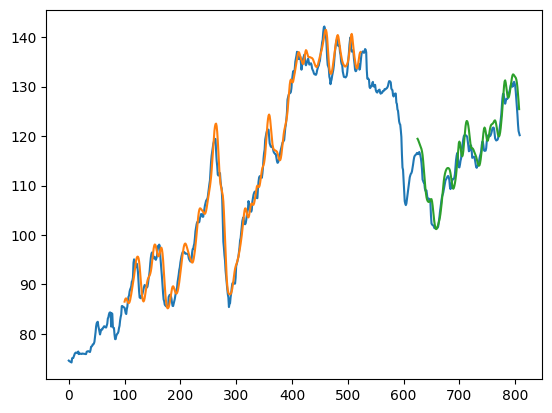

In [26]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
model.save("prtrol price prediction")

## **Using ARIMA**

In [32]:
!pip install --upgrade patsy

In [33]:
!pip install statsmodels

In [34]:
!pip install --upgrade --no-deps statsmodels

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv(r"/content/train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [5]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [6]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670599, 119.52143354, 119.30634698, 119.14818605,
       119.02925494, 118.93899217, 118.87071727, 118.81917633,
       118.78030453, 118.75097725, 118.72884028, 118.71213018,
       118.69951765, 118.6899984 , 118.68281381, 118.67739118,
       118.6732984 , 118.67020932, 118.66787782, 118.66611809,
       118.66478993, 118.66378748, 118.66303088, 118.66245982,
       118.66202882, 118.66170351, 118.66145798, 118.66127267,
       118.6611328 , 118.66102723])

# Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\train_data.csv')
df.head(10)

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
5,7/14/2003,74.21
6,7/21/2003,75.07
7,7/28/2003,75.10
8,8/4/2003,75.12
9,8/11/2003,75.44


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek

In [5]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol,Month,Day,Day_of_week
0,2003-06-09,74.59,6,9,0
1,2003-06-16,74.47,6,16,0
2,2003-06-23,74.42,6,23,0
3,2003-06-30,74.35,6,30,0
4,2003-07-07,74.28,7,7,0


In [6]:
df.isnull().sum()

Date           0
Petrol         2
Month          0
Day            0
Day_of_week    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
X = df[['Day', 'Month', 'Day_of_week']]
y = df['Petrol']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [10]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

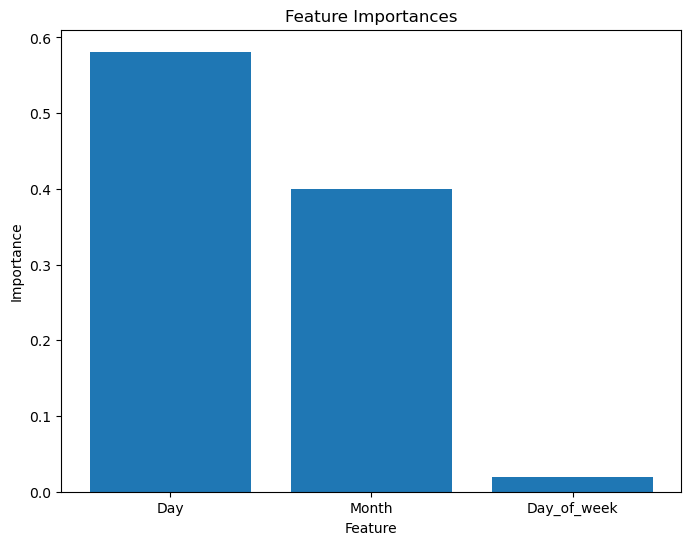

In [11]:
# Plot feature importances
feature_importances = model.feature_importances_
feature_names = ['Day', 'Month', 'Day_of_week']

plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [12]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [13]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

In [14]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train RMSE: 17.206103731745273
Test RMSE: 16.655919435877983
Train MAE: 15.419061827076508
Test MAE: 13.564656699193344


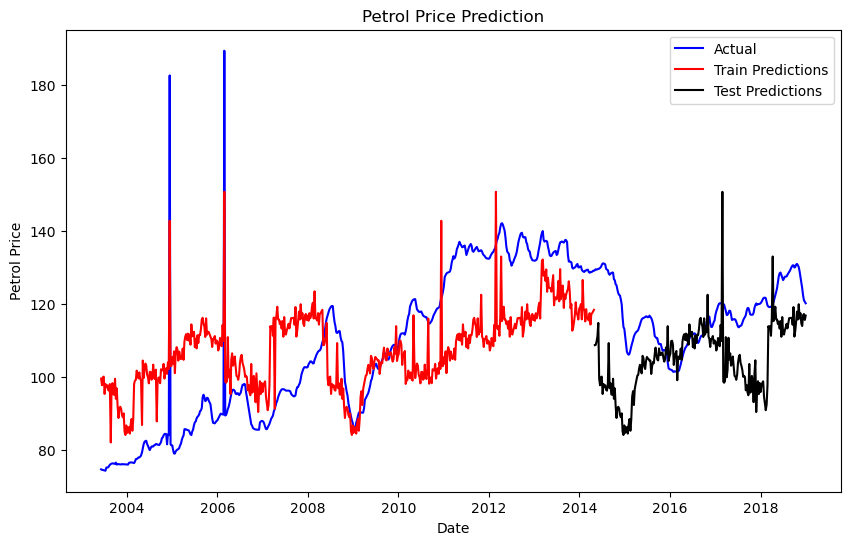

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Petrol'], label='Actual',color='blue')
plt.plot(df['Date'][:len(y_train)], y_pred_train, label='Train Predictions',color='red')
plt.plot(df['Date'][len(y_train):], y_pred_test, label='Test Predictions',color='black')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Prediction')
plt.legend()
plt.show()